In [70]:
using Lattices
using LinearAlgebra
using Combinatorics
using SparseArrays
using Plots
import Graphs
using LaTeXStrings
using Statistics
using Finch
# using GraphPlot
# using Compose

include("ed_objects.jl")
include("ed_functions.jl")

create_consistent_basis (generic function with 2 methods)

In [ ]:
using JLD2

jldsave(raw"D:\datasets\dqmc_hubbard\ED.jld2"; E=E, V=U,t=1, U=8,mu=2, half_filling=true, N_up=4, N_down=4, lattice=lattice)

In [4]:
using JLD2

d = load(raw"D:\datasets\dqmc_hubbard\ED.jld2")
V = d["V"]
lattice = d["lattice"]
t = d["t"]
E = d["E"]
μ = d["mu"]
N_up = d["N_up"]
N_down = d["N_down"]

4

# eigenstate comparison

In [2]:
# using KrylovKit

t = 1
U = 6
μ = 0  # positive incentivises fewer particles (one electron costs this much energy)
# N_up = 2
# N_down = 2
N = 6
half_filling = false
# lattice = Chain(6, Periodic())
lattice = Square((2,3), Periodic())
# lattice = Graphs.cycle_graph(3)

models = []
U_values = [0.001,0.01,0.2, 1,1.001,3,4,5,7,10, 100]
for U in U_values
    push!(models,HubbardModel(t,U,μ,half_filling))
end
subspace = HubbardSubspace(N, lattice)
# subspace = HubbardSubspace(N_up, N_down, lattice)

ops = []
push!(ops,Matrix(create_operator(subspace,:Sx)))
push!(ops, Matrix(create_operator(subspace,:S2)))
# op3 = Matrix(create_operator(subspace,:L2))
push!(ops, Matrix(create_operator(subspace,:T, kind=1)))
push!(ops, Matrix(create_operator(subspace,:T, kind=2)))
# push!(ops, Matrix(create_operator(subspace,:σ, kind=1)))
E = []
H = []
V = []
for model ∈ models
    push!(H, Matrix(create_Hubbard(model, subspace; perturbations=false)))
    e, v = eigen(H[end])
    push!(E, e)
    push!(V, v)
end

for i ∈ 1:2
    println(degeneracy_count(E[i]))
end

# println(sum(abs.(h1*h2-h2*h1)))
ops_tmp = [H[1], ops...]
for i in eachindex(ops_tmp)
    for j in i+1:length(ops_tmp)
        println("($i,$j) ", sum(abs.(ops_tmp[i]*ops_tmp[j] - ops_tmp[j]*ops_tmp[i])))
    end
end
# H1 = create_Hubbard(model, subspace; perturbations=false)
# E1 = diag(V1'*Matrix(H1)*V1)


Dict{Any, Any}(5 => 2, 4 => 6, 6 => 63, 7 => 1, 2 => 57, 10 => 12, 13 => 3, 35 => 1, 3 => 44, 19 => 1)
Dict{Any, Any}(5 => 2, 6 => 63, 7 => 1, 2 => 57, 10 => 13, 35 => 1, 11 => 1, 3 => 60)
(1,2) 0.0
(1,3) 0.0
(1,4) 0.0
(1,5) 0.0
(2,3) 0.0
(2,4) 0.0
(2,5) 0.0
(3,4) 0.0
(3,5) 0.0
(4,5) 0.0


In [3]:
degen_rm_U = create_consistent_basis(H, ops)

11-element Vector{Any}:
 ComplexF64[-3.616790390463813e-17 + 3.3902174335795064e-17im 4.74282842229069e-17 + 1.4366446421101362e-17im … 2.481048192249458e-32 - 2.3049990617986344e-32im 8.270768493125815e-32 + 3.504147208833036e-32im; -3.782035696689994e-18 + 2.6643939872074033e-18im -3.781405409957858e-18 + 2.6639499585641045e-18im … 0.012720762490501148 + 0.16384475463290674im 0.16162725049831436 - 0.029748140144682172im; … ; 0.0 + 0.0im 0.0 + 0.0im … 0.06502302490720666 - 0.003883917205568787im 0.04136429845120674 - 0.05030581346054419im; 2.1177431527661517e-17 - 9.993716302461107e-17im -9.710446392233749e-17 + 3.161784756229374e-17im … -1.2663757509019725e-32 + 1.4356707517651775e-32im -4.8488058877174597e-32 - 1.5074111282364414e-32im]
 ComplexF64[-3.6222163154410274e-17 + 3.395303452802394e-17im 4.7357151862025976e-17 + 1.43448998003845e-17im … -1.5026831544429762e-65 + 1.4323455407483322e-65im -1.4821179040814664e-50 - 1.4497623939371026e-50im; -2.6680386744776562e-18 - 3.7837250

In [3]:
degen = count_degeneracies_per_subspace(H[1], ops)
indices_of_interest = []
for (indices, val) in degen
    (d, dim) = val
    if length(d) == 0 && dim > 10
        push!(indices_of_interest, indices)
        # println(dim)
    elseif length(d) >= 1
        println(d, " ", indices)
    end
end

Dict{Any, Any}(2 => 1) [5, 3, 1, 2]
Dict{Any, Any}(2 => 1) [2, 2, 1, 2]
Dict{Any, Any}(2 => 1) [1, 1, 1, 1]
Dict{Any, Any}(2 => 1) [1, 1, 1, 3]
Dict{Any, Any}(2 => 1) [3, 1, 1, 2]
Dict{Any, Any}(2 => 1) [4, 1, 1, 2]
Dict{Any, Any}(2 => 1) [5, 3, 1, 1]
Dict{Any, Any}(2 => 1) [5, 3, 1, 3]
Dict{Any, Any}(2 => 1) [2, 2, 1, 1]
Dict{Any, Any}(2 => 1) [2, 2, 1, 3]
Dict{Any, Any}(2 => 1) [3, 1, 1, 1]
Dict{Any, Any}(2 => 1) [3, 1, 1, 3]
Dict{Any, Any}(2 => 1) [4, 1, 1, 1]
Dict{Any, Any}(2 => 1) [4, 1, 1, 3]
Dict{Any, Any}(2 => 1) [1, 1, 1, 2]


In [6]:
dim = get_subspace_dimension(subspace)
indexer = CombinationIndexer(reduce(vcat,collect(sites(subspace.lattice))), get_subspace_info(subspace)...)
difference_dict = collect_all_conf_differences(indexer)


Dict{Any, Any} with 6 entries:
  5 => Dict{Tuple{Tuple{Set{Coordinate{2, Int64}}, Set{Coordinate{2, Int64}}}, …
  4 => Dict{Tuple{Tuple{Set{Coordinate{2, Int64}}, Set{Coordinate{2, Int64}}}, …
  6 => Dict{Tuple{Tuple{Set{Coordinate{2, Int64}}, Set{Coordinate{2, Int64}}}, …
  2 => Dict{Tuple{Tuple{Set{Coordinate{2, Int64}}, Set{Coordinate{2, Int64}}}, …
  3 => Dict{Tuple{Tuple{Set{Coordinate{2, Int64}}, Set{Coordinate{2, Int64}}}, …
  1 => Dict{Tuple{Tuple{Set{Coordinate{2, Int64}}, Set{Coordinate{2, Int64}}}, …

In [25]:
second_quantized_order_labels = Dict()
n_electrons = sum([length(indexer.inv_comb_dict[1][j]) for j=1:2])
d = length(indexer.a)*2
m = 1
for order ∈ 1:n_electrons
    if order == 1
        second_quantized_order_labels[order] = 1:d^(2*order)
        m = (length(indexer.a)*2)^(2*order)
    else
        second_quantized_order_labels[order] = (m+1):(m+d^(2*order))
        m += d^(2*order)
    end
end
second_quantized_dimension = sum(length(s) for s in values(second_quantized_order_labels))



8978450801040

In [66]:

H = -1im*log(degen_rm_U[1]*degen_rm_U[9]')
n_electrons = sum([length(indexer.inv_comb_dict[1][j]) for j=1:2])
second_quantized_order_labels = Dict()
n_electrons = sum([length(indexer.inv_comb_dict[1][j]) for j=1:2])
# defining range of indices in the second quantized representation
d = length(indexer.a)*2
m = 1
for order ∈ 1:n_electrons
    if order == 1
        second_quantized_order_labels[order] = 1:d^(2*order)
        m = (length(indexer.a)*2)^(2*order)
    else
        second_quantized_order_labels[order] = (m+1):(m+d^(2*order))
        m += d^(2*order)
    end
end
second_quantized_dimension = sum(length(s) for s in values(second_quantized_order_labels))
second_quantized_solution = spzeros(ComplexF64, second_quantized_dimension)
second_quantized_nullspace = []
site_indexer = merge(Dict((s,:up)=>k for (k,s) in enumerate(indexer.a)), 
                    Dict((s,:down)=>k+length(indexer.a) for (k,s) in enumerate(indexer.a)))
inv_site_indexer = [[(s,:up) for s in indexer.a]; [(s,:down) for s in indexer.a]]

# difference_dict = collect_all_conf_differences(indexer)
for (swaps, N_diff_dict) in difference_dict
    println(swaps)
    for (site_diff, index_pairs) in N_diff_dict
        creation, annihilation = site_diff

        params = binomial(2*length(indexer.a) - 2*swaps, n_electrons-swaps)
        variables = cumsum([binomial(2*length(indexer.a) - 2*swaps, k) for k in 0:n_electrons-swaps])
        min_order = argmax(variables .- params .>= 0)

        # this maps an index to a combination of sites (not including the hopping ones) which
        # have n_i applied on them
        variable_mapping = [] 
        inverse_variable_mapping = Dict()
        
        # defining variable_mapping and inverse_variable_mapping
        var_index = 1
        sites_available = [setdiff(setdiff(indexer.a, creation[σ]), annihilation[σ]) for σ in 1:2]
        for n_operators in 0:min_order-1
            for n_up in 0:n_operators
                n_down = n_operators - n_up
                up_site_combs = [Set(s) for s in combinations(sites_available[1], n_up)]
                down_site_combs = [Set(s) for s in combinations(sites_available[2], n_down)]
                for filled_sites in Iterators.product(up_site_combs, down_site_combs)
                    push!(variable_mapping, filled_sites)
                    inverse_variable_mapping[filled_sites] = var_index
                    var_index += 1
                end
            end
        end


        matrix = zeros(ComplexF64, (params,variables[min_order]))
        vector = zeros(ComplexF64, params)
        # break
        row_index = 1
        for (i,j) in index_pairs
            common_sites = [intersect(indexer.inv_comb_dict[i][k], indexer.inv_comb_dict[j][k]) for k=1:2]
            for (col_index, s) in enumerate(variable_mapping)
                # col_index = inverse_variable_mapping[Tuple(common_sites)]
                if issubset(s[1], common_sites[1]) && issubset(s[2], common_sites[2])
                    matrix[row_index, col_index] = 1
                end
            end
            vector[row_index] = H[i,j]
            row_index += 1
        end

        nullspace_solution  = nullspace(matrix)
        particular_solution = matrix \ vector

        # put solution into a sparse matrix form in second quantized
        # println("creation: $creation")
        # println("annihilation: $annihilation")
        creation_index_list = []
        annihilation_index_list = []
        for (σ_i, σ) ∈ enumerate([:up, :down])
            for create_site in creation[σ_i]
                push!(creation_index_list,site_indexer[(create_site, σ)])
            end
            for annihilate_site in annihilation[σ_i]
                push!(annihilation_index_list,site_indexer[(annihilate_site, σ)])
            end
        end

        indices = [sort(creation_index_list) sort(annihilation_index_list)]'[:]
        if length(nullspace_solution) >0 
            push!(second_quantized_nullspace,spzeros(ComplexF64,second_quantized_dimension))
        end
        for (k,s) in enumerate(variable_mapping)
            _indices = copy(indices)
            for (σ_i, σ) in enumerate([:up, :down])
                for site in s[σ_i]
                    push!(_indices,site_indexer[(site, σ)])
                    push!(_indices,site_indexer[(site, σ)])
                end
            end
            order = swaps + length(s[1]) + length(s[2])
            # println("order: $order swaps: $swaps indices: $_indices k: $k")
            starting_index = minimum(second_quantized_order_labels[order])
            i = sum((_indices[n] - 1)*d^(n-1) for n in eachindex(_indices))
            second_quantized_solution[starting_index + i] = particular_solution[k]
            if length(nullspace_solution) > 0 
                second_quantized_nullspace[end][starting_index + i] = nullspace_solution[k]
            end
        end
    end

end

5
4
6
2
3
1


In [71]:
p = 2
pl = plot(xlabel="order", ylabel="$p norm")
for (k,u) in enumerate(U_values)
    second_quantized_solution, second_quantized_nullspace, second_quantized_order_labels = find_N_body_interactions(degen_rm_U[1]*degen_rm_U[k]', indexer)
    plot!([
        norm(second_quantized_solution[second_quantized_order_labels[i]],p)/(length(nonzeros(second_quantized_solution[second_quantized_order_labels[i]])))^(1/p) 
        for i∈1:6], label=L"U=%$u")
end
savefig(pl, "true_orders.pdf")

5
4
6
2
3
1
5
4
6
2
3
1
5
4
6
2
3
1
5
4
6
2
3
1
5
4
6
2
3
1
5
4
6
2
3
1
5
4
6
2
3
1
5
4
6
2
3
1
5
4
6
2
3
1
5
4
6
2
3
1
5
4
6
2
3
1


"c:\\Users\\jonat\\OneDrive - Cornell University\\programming\\cornell courses\\research\\experimenting\\ed\\true_orders.pdf"

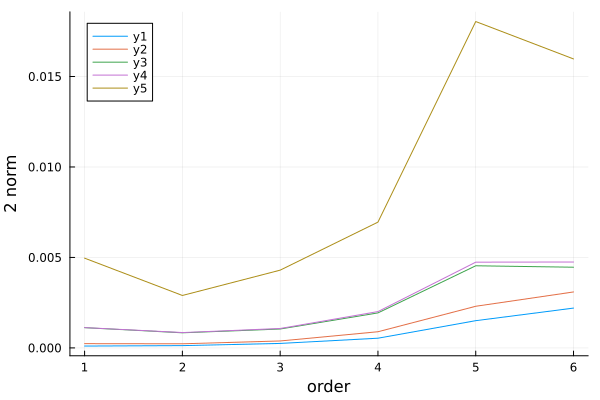

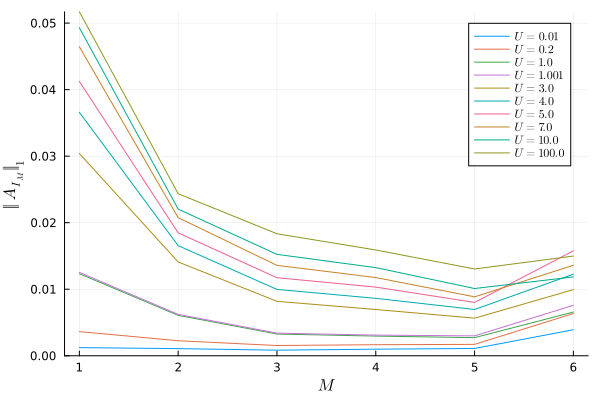

In [12]:
pl = plot(xlabel=L"M", ylabel=L"\Vert A_{I_M}\Vert_1", legend=:topright)
for (k,u) in enumerate(U_values)
    if k == 1
        continue
        # new_U ,_ = qr(rand(size(degen_rm_U[1]*degen_rm_U[1]')...))
        # # println(new_U)
        # hopping = log(Matrix(new_U))
    else
        hopping = log(degen_rm_U[1]*degen_rm_U[k]')
    end

    total = Dict()
    for (order, creation_annihiation) in difference_dict
        for index_list in values(creation_annihiation)
            for (i,j) in index_list
                if abs(hopping[i,j]) > 0
                    if !(order in keys(total))
                        total[order] = [hopping[i,j]]
                    else
                        push!(total[order],hopping[i,j])
                    end
                end
            end
        end
    end
    orders = sort(collect(keys(total)))
    global total
    average_coef = [mean(abs.(total[o])) for o in orders]
    # std_coef = [std(total[o])/sqrt(length(total[o])) for o in orders]
    if k == 1
        plot!(pl, orders, average_coef, label="random unitary", linestyle=:dash, color=:black,xticks=orders)
    else
        plot!(pl, orders, average_coef,label=L"U=%$(u)",xticks=orders)
    end
end
plot!(pl,  ylims=(0,Inf),)
# savefig(pl,"order_images\\average_coeff_2x3_N=3.png")
display(pl)

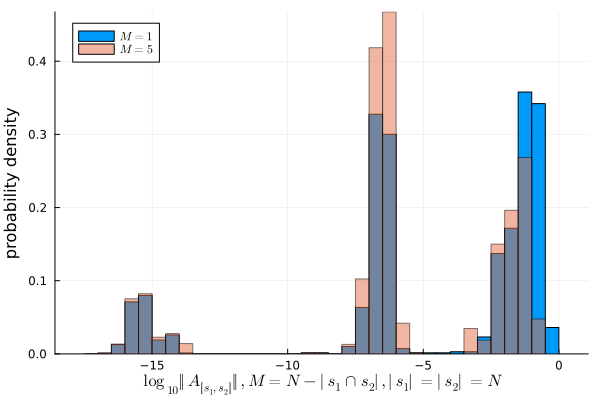

In [18]:
histogram(log10.(abs.(total[1])), normalize=:pdf, label=L"M=1")
histogram!(log10.(abs.(total[5])), normalize=:pdf, alpha=0.5, label=L"M=5", xlabel=L"\log_{10} \Vert A_{[s_1,s_2]}\Vert, M=N-|s_1\cap s_2|, |s_1|=|s_2|=N", ylabel="probability density")
# mean(abs.(filter(x-> -0.05<x<0.05,total[5]))), mean(abs.(filter(x-> -0.05<x<0.05,total[1])))

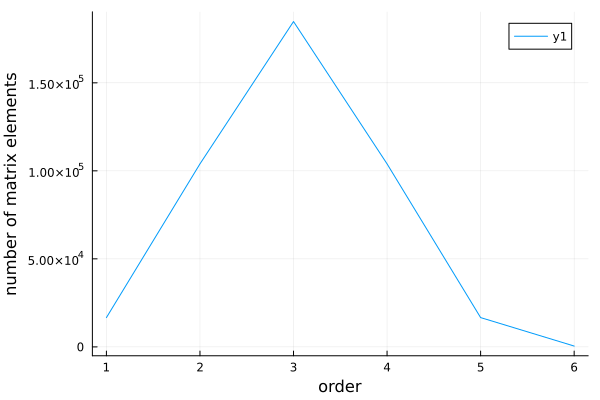

In [7]:
plot(1:maximum(collect(keys(total))), [length(total[i]) for i in 1:maximum(collect(keys(total)))], xlabel="order", ylabel="number of matrix elements")

In [ ]:
using DataStructures

h_tmp = copy(h1)
E,V = eigen(Matrix(op3))
println(counter(round.(angle.(E)/(2*pi)*360)))
h_tmp = real.(filter_matrix_by_vector(V'*h_tmp*V, E, 1))
E,V = eigen(h_tmp)
degeneracy_count(E)
# counter(round.(E*100))

Accumulator(0.0 => 39, 60.0 => 36, 180.0 => 36, 120.0 => 39, -60.0 => 36, -120.0 => 39)


Dict{Any, Any} with 3 entries:
  7 => 1
  2 => 7
  3 => 1

In [ ]:
# full_U1'*H[4]*full_U1
# sum(abs.(sort(real.(diag(full_U2'*H[4]*full_U2))) -E[4]))
full_U2*full_U1'

495×495 Matrix{ComplexF64}:
          1.0-1.93175e-18im  …   6.93889e-17-4.85723e-17im
  1.45901e-33-1.23472e-33im      7.34019e-33+2.30271e-33im
  2.88182e-18+1.25757e-17im      9.84294e-18+1.32359e-17im
  3.63069e-18+1.20987e-17im     -1.36022e-18+9.90441e-18im
 -6.29139e-34+4.93154e-33im     -1.12015e-32+5.3105e-33im
 -5.55112e-17-5.89806e-17im  …   1.11022e-16+6.93889e-18im
  4.93783e-33-6.88667e-35im      5.54204e-34+1.5287e-33im
  4.84921e-18+1.77883e-17im     -4.32814e-20+6.6255e-18im
  3.80748e-33-4.83374e-33im     -6.52998e-35+9.66335e-34im
  2.03674e-18+3.86456e-18im       -8.118e-19-3.05619e-17im
  3.62985e-18+6.00811e-18im  …  -2.06328e-17+1.54889e-18im
  2.59344e-34+1.03036e-33im      4.40207e-34+7.17239e-33im
  1.32593e-17-1.32801e-18im      3.25845e-18-1.63791e-17im
             ⋮               ⋱  
     5.04e-18+2.23986e-17im      2.00081e-18-5.03927e-19im
   4.8447e-34+2.86742e-33im     -6.01351e-33-3.48061e-33im
 -1.38778e-16-8.32667e-17im  …   1.52656e-16+9.71445e-17i

Any[-0.5, 0.75, 0, 0]


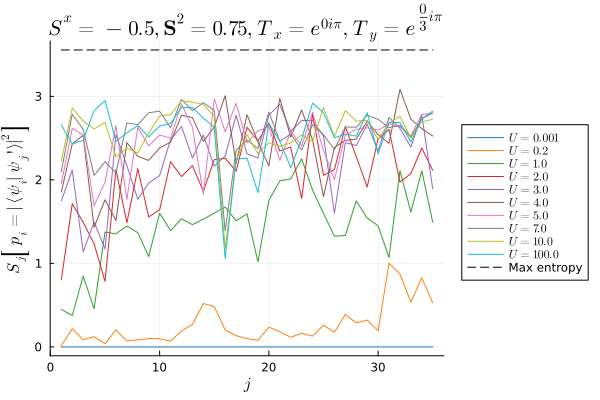

In [ ]:
i = 3
basis_transform, eigenvalues = filter_subspace([op1, op2, op4, op5], indices_of_interest[i])
_, V1, _ = schur(basis_transform'*H[1]*basis_transform)

eigenvalues[1:2] = round.(real.(eigenvalues[1:2]);digits=3)
eigenvalues[3:4] = angle.(eigenvalues[3:4])./pi
eigenvalues[4] *= 3
# eigenvalues[3] *= 2
eigenvalues[3:4] = Int.(round.(eigenvalues[3:4] ))
println(eigenvalues)
pl = plot(ylabel=L"S_j\left[p_i=|\langle \psi_i |\psi_j'\rangle|^2\right]", 
            xlabel=L"j",legend=:outerright, palette=:tab10,
            title=L"S^x=%$(eigenvalues[1]), \mathbf{S}^2=%$(eigenvalues[2]), T_x=e^{%$(eigenvalues[3]) i\pi }, T_y=e^{\frac{%$(eigenvalues[4])}{3} i\pi }")
for (u, h) in zip(U_values,H)
    _, V2, _ = schur(real.(basis_transform'*h*basis_transform))
    overlap = abs.(V1'*V2)
    p = abs.(overlap).^2
    entropy = ifelse.(p .> 0, -p .* log.(p), 0)
    # sum(entropy, dims=1)[1:7]
    # println(sqrt(tr((overlap-I)*(overlap-I)')))
    plot!(pl, collect(Iterators.flatten(sum(entropy, dims=1))),  label=L"U=%$(u)")
end
plot!(pl, [1, size(V1,1)], [log(size(V1,1)),log(size(V1,1))], label="Max entropy", linecolor=:black, linestyle=:dash)
savefig("images/entropy2x3_$(indices_of_interest[i])_N=$N.pdf")
display(pl)

In [ ]:
i = 3
basis_transform, eigenvalues = filter_subspace([op1, op2, op4, op5], indices_of_interest[i])
_, V1, _ = schur(real.(basis_transform'*H[1]*basis_transform))
_, V2, _ = schur(real.(basis_transform'*H[2]*basis_transform))
# sum(abs2.(basis_transform*V1*basis_transform')[1,:])
sum(abs2.(V1[1,:]))

0.9999999999999996

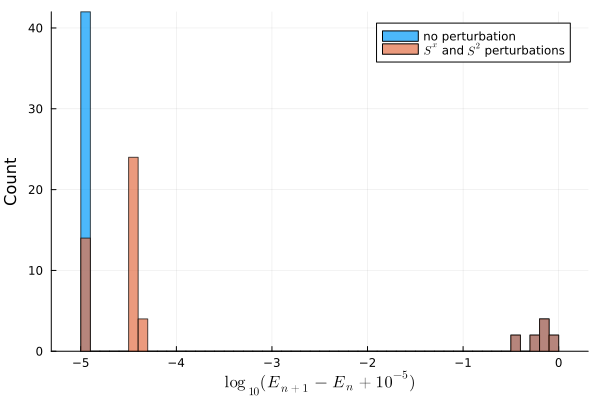

In [17]:
using StatsBase
epsilon = 1e-5

histogram(log10.(diff(real.(E[1])).+1e-5),bins=-5:0.1:0, label="no perturbation", ylabel="Count", xlabel=L"\log_{10}(E_{n+1}-E_{n}+10^{-5})",alpha=0.7)
histogram!(log10.(diff(real.(E[2])).+1e-5),bins=-5:0.1:0, label=L"$S^x$ and $S^2$ perturbations",alpha=0.7)
# plot!([0,250],[epsilon, epsilon],color="black")
# plot!(diff(E2))
# savefig("3x3_N=5_perturbation_effect.pdf")

In [ ]:
s1 = Set(findall(x-> (x<1e-6), diff(E1)))
s2 = Set(findall(x-> (x<1e-6), diff(E2)))
println(length(setdiff(union(s1,s2),symdiff(s1, s2))) - min(length(s2), length(s1)))

setdiff(s1, s2)

-4


Set{Int64} with 4 elements:
  484
  627
  505
  620

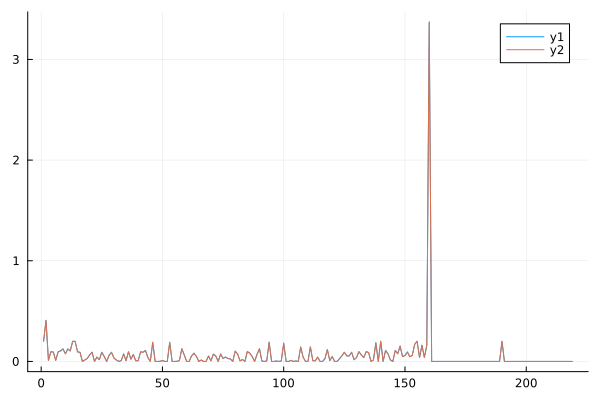

In [13]:
plot(abs.(diff(diag(V1'*H2*V1))))
plot!(abs.(diff(diag(V2'*H2*V2))))

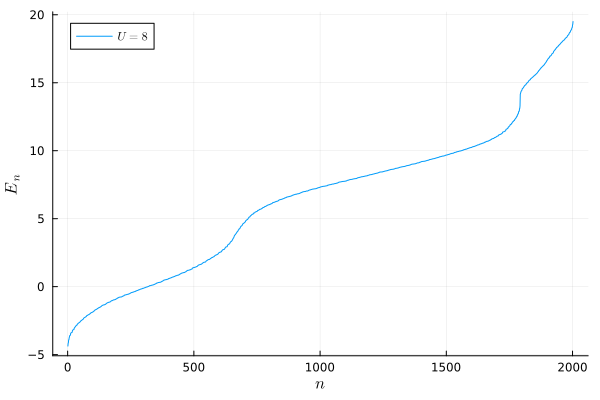

In [241]:
plot(E1, label=L"U=8", xlabel=L"n", ylabel=L"E_n")
# plot!(E2, label=L"U=16")
# plot!(E3, label=L"U=4")
# plot!(E5, label=L"U=7")
# plot!(E1,label=L"U=8")
# plot!(E6, label=L"U=10")
# savefig("3x3_mu=0_N=5.pdf")

In [43]:
U = V1'*V2 # energy basis
# sum(abs.(V1*U - V2))

p = abs.(U).^2
entropy = ifelse.(p .> 0, -p .* log.(p), 0)
# sum(entropy, dims=1)[1:7]
println(sqrt(tr((U-I)*(U-I)')))
sort(collect(Iterators.flatten(sum(entropy, dims=1))))

21.164111439747483


220-element Vector{Real}:
 -1.3322676294594337e-15
 -1.3322675877401919e-15
 -8.881784196489471e-16
 -8.881784152110461e-16
 -8.881783946470448e-16
 -8.881783728964097e-16
 -8.881781775751524e-16
 -4.4408920984410603e-16
 -4.4408920984340616e-16
 -4.440892094559743e-16
 -4.4408920901550995e-16
 -4.4408920843433108e-16
 -4.440892017035139e-16
  ⋮
  2.112446709904766
  2.117842350510945
  2.1233866932571486
  2.131917590078454
  2.1538853908616704
  2.1563823776925948
  2.183380225527846
  2.215692199846435
  2.315467625742235
  2.315467625745109
  2.350202161265325
  2.350202161265331

In [26]:
U = V2*V1' # computational basis 

# this unitary makes more sense to compute the quantum complexity of
p = abs.(U).^2
entropy = ifelse.(p .> 0, -p .* log.(p), 0)
sum(entropy, dims=1)[1:7]

7-element Vector{Float64}:
 4.67502010839971
 4.680287262859502
 4.659354108209212
 4.424107517776376
 4.6178977430646215
 4.729190837543825
 4.55988444900022

In [203]:
sort(diag(U))

56-element Vector{Float64}:
 -0.3622350403989767
 -0.2992150624609179
 -0.28993672285175137
 -0.21152239006569346
 -0.18832856913509408
 -0.1797076847870786
 -0.16965019734967052
 -0.16877421666506393
 -0.14366475399341608
 -0.13935394727038908
  ⋮
  0.10492454137675775
  0.12499828731651998
  0.12499915911691023
  0.2006406396609804
  0.20268272751856967
  0.24772500474752243
  0.3003698974614383
  0.3727207820225861
  0.420179608426703

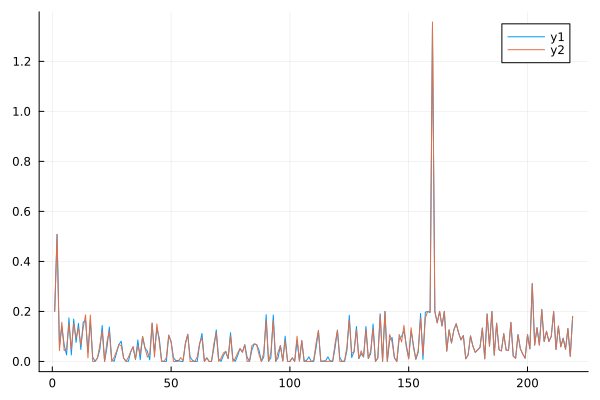

In [58]:
using Plots
plot(diff(E1))
plot!(diff(E2))

In [176]:
cicj = [dot(V2[:,3], cicj_array2[i,j,k]*V2[:,3]) for i=1:4, j=1:4, k=1:2]
for i=1:4
    println(cicj[i,i,1] + cicj[i,i,2])
end

0.749277920394003
0.7507255718773945
0.7507221048571685
0.7492744028714353


# Heisenberg 

In [5]:
N=2
lattice = Graphs.grid((2,2))
# lattice = Graphs.cycle_graph(3)

subspace = HubbardSubspace(N, lattice)
# subspace = HubbardSubspace(N_up, N_down, lattice)
h,indexer = create_Heisenberg(1.0, 0.5, subspace)

E,V = eigen(Matrix(h))
println(E)
psi0 = maximum(V[:,1])
for (i, psi) in enumerate(V[:,1])
    if abs.(psi) > 1e-8
        println(psi, " ", combination(indexer, i))
    end
end

[-3.22817805262833, -1.8789024427351722, -1.8789024427351722, -1.8789024427351713, -1.8789024427351713, -1.8789024427351713, -1.8789024427351642, -0.7500000000000022, -0.7499999999999953, -0.7499999999999949, 0.0, 0.0, 5.204170427930421e-17, 5.174920444975781e-16, 2.7555905900771413e-15, 0.25000000000000067, 0.2500000000000009, 0.2500000000000018, 0.2500000000000018, 0.250000000000002, 0.250000000000002, 2.1289024427351744, 2.1289024427351744, 2.128902442735175, 2.128902442735175, 2.128902442735175, 2.1289024427351753, 2.4781780526283317]
-0.2659220264360266 (Set([1]), Set([2]))
-0.2659220264360278 (Set([1]), Set([3]))
0.3295010648121068 (Set([1]), Set([4]))
0.26592202643602886 (Set([2]), Set([1]))
0.3295010648121091 (Set([2]), Set([3]))
-0.26592202643602775 (Set([2]), Set([4]))
0.2659220264360277 (Set([3]), Set([1]))
-0.32950106481210656 (Set([3]), Set([2]))
-0.2659220264360278 (Set([3]), Set([4]))
-0.32950106481210883 (Set([4]), Set([1]))
0.2659220264360276 (Set([4]), Set([2]))
0.265

# test

In [ ]:
# this attempt to see if there are any unitary transforms that 
# map the hubbard model to a density-density interaction model. The
# answer seems to be no, since only a unitary that commutes with the 
# Hamiltonian satisfies the constraint.
using LinearAlgebra
N = 5
Vp = rand(N,N)
tp = rand(N,N)
coefficients = zeros(N^3,2N^2)
convert_to_index(i,j) = (i-1)*N + j
convert_to_index(i,j,k) = (i-1)*N^2 + (j-1)*N + k
for (i,j,k) in Iterators.product(1:N, 1:N, 1:N)
    index = convert_to_index(i,j,k)
    coefficients[index, convert_to_index(k,i)] += Vp[i,j]-Vp[k,j]
    coefficients[index, convert_to_index(k,j)] += Vp[j,i]
    coefficients[index, convert_to_index(j,i)] += -Vp[j,k]

    coefficients[index, convert_to_index(i,j) + N^2] += -tp[k,i]
    coefficients[index, convert_to_index(j,i) + N^2] += -tp[k,j]
    coefficients[index, convert_to_index(k,j) + N^2] += tp[k,i]
    coefficients[index, convert_to_index(j,k) + N^2] += tp[j,i]
end
nullspace(coefficients)

50×1 Matrix{Float64}:
 0.16494158780944476
 0.1449519372457409
 0.04135351413576674
 0.16859104363942065
 0.20375454521249475
 0.1755925757934566
 0.14674946556946833
 0.07662602714201561
 0.14911511546543396
 0.20071850747242637
 0.12466895442338624
 0.22168736618288148
 0.02099487050589935
 ⋮
 0.04733686495791092
 0.022925758425951594
 0.12920987252455568
 0.22695664577273458
 0.10615683408636473
 0.19385937487464444
 0.065012283584813
 0.0075372541325304885
 0.17501632989589408
 0.07496970961599618
 0.15781500659950892
 0.10171354317531481